In [1]:
import concurrent.futures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import missingno as msno
from bs4 import BeautifulSoup

In [18]:
# 책의 URL을 가져오는 코드
# 책의 URL 형식은 공통적으로 https://www.yes24.com/Product/Search?domain=ALL&query={}
path = "C:/Users/user/Desktop/K-Digital Project 002/K_Digital_02/kkh3363/분석 자료/개발자2/New_Data/"
books_url = [] # URL을 기록
book_data = pd.read_csv(path + 'all_data_drop_duplicates.csv')

C:\Users\user\AppData\Local\Temp\ipykernel_22024\2088016167.py:5: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  book_data = pd.read_csv(path + 'all_data_drop_duplicates.csv')


In [19]:
# 책의 URL 저장

for isbn in book_data['ISBN_THIRTEEN_NO'].unique():
    books_url.append(f"https://www.yes24.com/Product/Search?domain=ALL&query={isbn}")

In [20]:
# 책의 URL에 따라서 평점을 가져오는 코드이다.

def get_score(url):
    res = requests.post(url)
    soup = BeautifulSoup(res.text , 'html5lib')
    tag_name = "#yesSchList > li > div > div.item_info > div.info_row.info_rating > span.rating_grade > em"
    score = soup.select(tag_name)
    try:
        return score[0].text
    except:
        return np.NaN
        
# 책의 판매지수 가져오는 코드이다.

def get_sale(url):
    res = requests.post(url)
    soup = BeautifulSoup(res.text , 'html5lib')
    tag_name = "#yesSchList > li > div > div.item_info > div.info_row.info_rating > span.saleNum"
    sale = soup.select(tag_name)
    try:
        return sale[0].text.split()[1]
    except:
        return np.NaN

# 책의 가격을 가져오는 코드이다.

def get_price(url):
    res = requests.post(url)
    soup = BeautifulSoup(res.text , 'html5lib')
    tag_name = '#yesSchList > li > div > div.item_info > div.info_row.info_price > strong > em'
    price = soup.select(tag_name)
    try:
        return price[0].text
    except:
        return np.NaN

In [25]:
# 병렬작업 함수 구현

def scrape_scores_parallel(books_url):
    book_scores = {}
    with concurrent.futures.ThreadPoolExecutor() as executor:
        scores = list(executor.map(get_score , books_url))
    
    for i , url in enumerate(books_url):
        book_scores[url.split('=')[2]] = scores[i]
    
    return book_scores

def scrape_sales_parallel(books_url):
    book_sales = {}
    with concurrent.futures.ThreadPoolExecutor() as executor:
        sales = list(executor.map(get_sale , books_url))

    for i , url in enumerate(books_url):
        book_sales[url.split('=')[2]] = sales[i]
    
    return book_sales

def scrape_price_parallel(books_url):
    book_price = {}
    with concurrent.futures.ThreadPoolExecutor() as executor:
        price = list(executor.map(get_price , books_url))
    
    for i , url in enumerate(books_url):
        book_price[url.split('=')[2]] = price[i]
    
    return book_price

In [26]:
# timestamp
start = time.time()

# 평점 스크래핑
print("---------- 병렬 스크랩핑 중 ----------")
book_scores_parallel = scrape_scores_parallel(books_url)
print("---------- 평점 스크래핑 완료 ----------")
print(book_scores_parallel)

end = time.time()

# 걸린 시간
print(f"Time Stamp : {end - start}")

---------- 병렬 스크랩핑 중 ----------


In [9]:
data = pd.DataFrame(
    {
        'ISBN' : book_scores_parallel.keys() ,
        'Score' : book_scores_parallel.values()
    }
)

data.to_csv(path + 'Score.csv' , index = False)

In [ ]:
# timestamp
start = time.time()

# 판매지수 스크래핑
print("---------- 병렬 스크랩핑 중 ----------")
book_sales_parallel = scrape_sales_parallel(books_url)
print("---------- 판매지수 스크래핑 완료 ----------")
print(book_sales_parallel)

end = time.time()

# 걸린 시간
print(f"Time Stamp : {end - start}")

---------- 병렬 스크랩핑 중 ----------
---------- 판매지수 스크래핑 완료 ----------
{'9798964963999': nan, '9791197634116': '1,278', '9791197634109': '5,232', '9791197603600': '48', '9791197578410': '40,011', '9791197578007': '528', '9791197572111': '1,083', '9791197550904': '312', '9791197549304': '4,266', '9791197522901': '1,092', '9791197519628': '1,734', '9791197519000': '120', '9791197516511': '294', '9791197516504': '612', '9791197510656': '720', '9791197510601': '1,338', '9791197504136': '10,077', '9791197494208': '3,786', '9791197488900': '444', '9791197488207': '744', '9791197472510': nan, '9791197470417': '60', '9791197459702': '90', '9791197455407': nan, '9791197453304': '3,720', '9791197450112': '600', '9791197438714': '2,991', '9791197438707': '4,800', '9791197437311': '128,295', '9791197437304': '105,960', '9791197434907': '1,014', '9791197426377': '4,413', '9791197419102': '13,677', '9791197413025': '78,021', '9791197412318': nan, '9791197412301': '264', '9791197410307': '4,881', '979119

In [ ]:
data = pd.DataFrame(
    {
        'ISBN' : book_sales_parallel.keys() ,
        'Sale' : book_sales_parallel.values()
    }
)

data.to_csv(path + 'Sale.csv' , index = False)

In [10]:
# timestamp
start = time.time()

# 가격 스크래핑
print("---------- 병렬 스크랩핑 중 ----------")
book_price_parallel = scrape_price_parallel(books_url)
print("---------- 가격 스크래핑 완료 ----------")
print(book_price_parallel)

end = time.time()

# 걸린 시간
print(f"Time Stamp : {end - start}")

---------- 병렬 스크랩핑 중 ----------
---------- 가격 스크래핑 완료 ----------
{'9798964963999': nan, '9791197634116': '14,400', '9791197634109': '13,500', '9791197603600': '16,200', '9791197578410': '12,600', '9791197578007': '16,200', '9791197572111': '14,220', '9791197550904': '14,400', '9791197549304': '16,650', '9791197522901': '16,200', '9791197519628': '15,120', '9791197519000': '11,700', '9791197516511': '16,200', '9791197516504': '15,300', '9791197510656': '14,220', '9791197510601': '15,300', '9791197504136': '13,500', '9791197494208': '11,700', '9791197488900': '18,000', '9791197488207': '16,200', '9791197472510': nan, '9791197470417': '15,120', '9791197459702': '13,500', '9791197455407': '11,520', '9791197453304': '11,700', '9791197450112': '11,400', '9791197438714': '15,750', '9791197438707': '16,650', '9791197437311': '16,650', '9791197437304': '16,650', '9791197434907': '15,300', '9791197426377': '21,420', '9791197419102': '13,500', '9791197413025': '19,800', '9791197412318': '15,300',

In [11]:
data = pd.DataFrame(
    {
        'ISBN' : book_price_parallel.keys() ,
        'Price' : book_price_parallel.values()
    }
)

data.to_csv(path + 'Price.csv' , index = False)

In [4]:
# 데이터 불러오기

sale = pd.read_csv(path + 'Sale.csv')
score = pd.read_csv(path + 'Score.csv')
price = pd.read_csv(path + 'Price.csv')

In [5]:
merged_data = pd.merge(sale , score , on = 'ISBN' , how = 'outer')
merged_data = pd.merge(merged_data , price , on = 'ISBN' , how = 'outer')

Text(0.5, 1.0, 'Missing Value in merged_data')

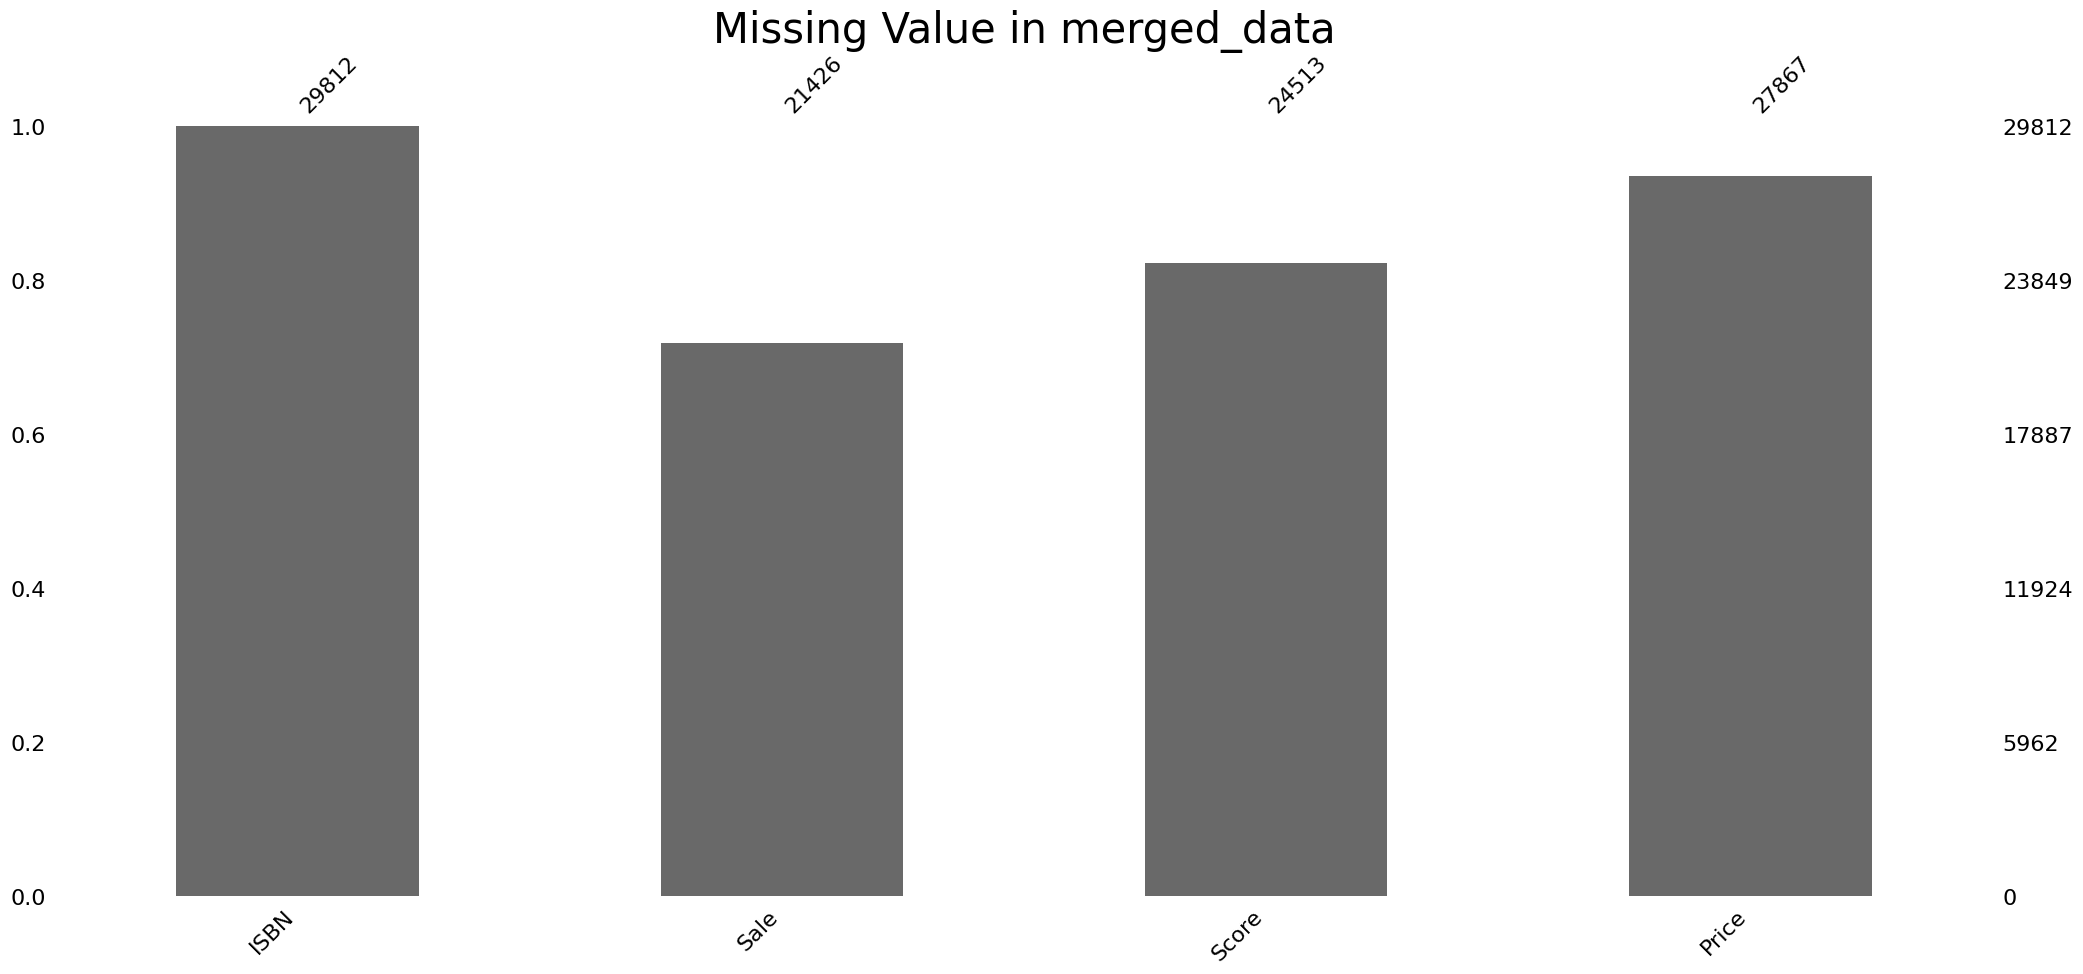

In [17]:
msno.bar(merged_data)

plt.title('Missing Value in merged_data' , fontsize = 30)

In [20]:
# 합병 데이터 csv파일 저장
merged_data.to_csv(path + 'Merged_Data.csv' , index = False)

In [6]:
# 원천 데이터 합병

merged_data = pd.read_csv(path + 'Merged_Data.csv')

orig_data = pd.read_csv(path + 'Data.csv' , encoding = 'cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_13188\2502438937.py:5: DtypeWarning: Columns (11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orig_data = pd.read_csv(path + 'Data.csv' , encoding = 'cp949')


In [7]:
merged_data.rename(columns = {'ISBN' : 'ISBN_THIRTEEN_NO'} , inplace = True)

In [15]:
merged_orig_data = pd.merge(orig_data , merged_data , on = 'ISBN_THIRTEEN_NO' , how = 'outer')

In [17]:
# 원천데이터 저장

merged_orig_data.to_csv(path + 'merged_orig_data.csv' , index = False)

In [20]:
# yes_24의 데이터의 컬럼을 변경하기

merged_orig_data.rename(columns = {'Sale' : 'yes24_Sale'} , inplace = True)
merged_orig_data.rename(columns = {'Score' : 'yes24_Score'} , inplace = True)
merged_orig_data.rename(columns = {'Price' : 'yes24_Price'} , inplace = True)

In [22]:
# 교보문고 데이터

kyobo = pd.read_excel(path + 'ISBN13_Kyobo.xlsx')

In [26]:
# Sale , Score , Price

merged_orig_data = pd.merge(merged_orig_data , kyobo , on = 'ISBN_THIRTEEN_NO' , how = 'outer')

In [28]:
merged_orig_data.rename(columns = {'교보문고_가격' : 'kyobo_Price'} , inplace = True)
merged_orig_data.rename(columns = {'교보문고_별점' : 'kyobo_Score'} , inplace = True)
merged_orig_data.rename(columns = {'교보문고_리뷰' : 'kyobo_Sale'} , inplace = True)

In [31]:
merged_orig_data.to_csv(path + 'merged_orig_data.csv' , index = False)